In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns 

sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.5)

In [2]:
pwd

'C:\\Users\\Lenovo\\OneDrive - Liverpool John Moores University\\Msc Data Science\\7021 Data Mining and ML\\Coursework'

In [3]:
metadata = pd.read_csv('metadata.csv')
metadata_test = pd.read_csv('metadata_test.csv')
#predictions_sample = pd.read_csv('predictions_sample.csv')
signals = pd.read_csv('signals.csv')
signals_test = pd.read_csv('signals_test.csv')

In [4]:
metadata.shape

(8129, 32)

In [5]:
metadata_test.shape

(2621, 31)

In [6]:
signals.shape

(811637, 5)

In [7]:
signals_test.shape

(261686, 5)

In [8]:
signals

user_snippet  x-axis  y-axis  z-axis  timestamp
0            1008_0   -5.01   10.99    4.75        0.0
1            1008_0   -2.72   13.25    4.44       50.0
2            1008_0    5.41   13.18    1.27      100.0
3            1008_0   -1.80    0.15   -2.72      150.0
4            1008_0   -2.91   -3.87   -2.49      200.0
...             ...     ...     ...     ...        ...
811632     1489_325   -0.23   10.84   -1.50     4750.0
811633     1489_325    5.37   10.34    0.57     4800.0
811634     1489_325    4.52    4.71    0.76     4850.0
811635     1489_325   -4.14    4.71   -1.33     4900.0
811636     1489_325  -19.61    9.00  -10.00     4950.0

[811637 rows x 5 columns]

In [9]:
signals.dtypes

user_snippet     object
x-axis          float64
y-axis          float64
z-axis          float64
timestamp       float64
dtype: object

In [10]:
metadata.dtypes

user_snippet                   object
x-axis__sum_values            float64
x-axis__median                float64
x-axis__mean                  float64
x-axis__length                float64
x-axis__standard_deviation    float64
x-axis__variance              float64
x-axis__root_mean_square      float64
x-axis__maximum               float64
x-axis__absolute_maximum      float64
x-axis__minimum               float64
y-axis__sum_values            float64
y-axis__median                float64
y-axis__mean                  float64
y-axis__length                float64
y-axis__standard_deviation    float64
y-axis__variance              float64
y-axis__root_mean_square      float64
y-axis__maximum               float64
y-axis__absolute_maximum      float64
y-axis__minimum               float64
z-axis__sum_values            float64
z-axis__median                float64
z-axis__mean                  float64
z-axis__length                float64
z-axis__standard_deviation    float64
z-axis__vari

In [11]:
signals.isna().sum() / signals.shape[0] #dividing by number of rows to get the % of null values exists in each column

user_snippet    0.0
x-axis          0.0
y-axis          0.0
z-axis          0.0
timestamp       0.0
dtype: float64

In [12]:
metadata.isna().sum() / metadata.shape[0] 

user_snippet                  0.0
x-axis__sum_values            0.0
x-axis__median                0.0
x-axis__mean                  0.0
x-axis__length                0.0
x-axis__standard_deviation    0.0
x-axis__variance              0.0
x-axis__root_mean_square      0.0
x-axis__maximum               0.0
x-axis__absolute_maximum      0.0
x-axis__minimum               0.0
y-axis__sum_values            0.0
y-axis__median                0.0
y-axis__mean                  0.0
y-axis__length                0.0
y-axis__standard_deviation    0.0
y-axis__variance              0.0
y-axis__root_mean_square      0.0
y-axis__maximum               0.0
y-axis__absolute_maximum      0.0
y-axis__minimum               0.0
z-axis__sum_values            0.0
z-axis__median                0.0
z-axis__mean                  0.0
z-axis__length                0.0
z-axis__standard_deviation    0.0
z-axis__variance              0.0
z-axis__root_mean_square      0.0
z-axis__maximum               0.0
z-axis__absolu

In [13]:
print(signals_test.isna().sum().sum())
print(metadata_test.isna().sum().sum()) 

0
0


In [14]:
metadata.describe()

x-axis__sum_values  x-axis__median  x-axis__mean  x-axis__length  \
count         8129.000000     8129.000000   8129.000000     8129.000000   
mean            69.274896        0.676201      0.693051       99.844630   
std            470.377247        4.668732      4.708664        3.097711   
min          -1083.170000      -14.920000    -10.831700        3.000000   
25%           -206.770000       -2.050000     -2.073200      100.000000   
50%             48.150000        0.455000      0.486700      100.000000   
75%            410.990000        3.890000      4.112500      100.000000   
max           1098.560000       14.730000     10.985600      100.000000   

       x-axis__standard_deviation  x-axis__variance  x-axis__root_mean_square  \
count                 8129.000000       8129.000000               8129.000000   
mean                     4.641068         29.047677                  6.421655   
std                      2.740271         29.730254                  3.234256   
min                      0.015658          0.000245                  0.053151   
25%                      2.674893          7.155052                  3.947468   
50%                      4.432626         19.648175                  5.827970   
75%                      6.162243         37.973236                  9.200111   
max                     12.903504        166.500420                 15.040870   

       x-axis__maximum  x-axis__absolute_maximum  x-axis__minimum  ...  \
count      8129.000000               8129.000000      8129.000000  ...   
mean         10.913154                 13.784513        -8.876572  ...   
std           6.809988                  5.569093         6.676138  ...   
min          -7.590000                  0.110000       -19.610000  ...   
25%           5.790000                  9.300000       -14.060000  ...   
50%          11.140000                 15.090000        -8.120000  ...   
75%          17.350000                 19.230000        -3.980000  ...   
max          19.950000                 19.950000         8.920000  ...   

       z-axis__sum_values  z-axis__median  z-axis__mean  z-axis__length  \
count         8129.000000     8129.000000   8129.000000     8129.000000   
mean            46.580992        0.027210      0.466839       99.844630   
std            238.184152        2.496128      2.383578        3.097711   
min           -795.480000       -8.065000     -7.954800        3.000000   
25%            -71.630000       -1.320000     -0.717100      100.000000   
50%              6.006575       -0.422231      0.061564      100.000000   
75%            143.710000        1.035146      1.440200      100.000000   
max            969.820000        9.720000      9.698200      100.000000   

       z-axis__standard_deviation  z-axis__variance  z-axis__root_mean_square  \
count                 8129.000000       8129.000000               8129.000000   
mean                     3.777133         17.737860                  4.515935   
std                      1.863211         15.381266                  1.800909   
min                      0.019697          0.000388                  0.191008   
25%                      2.899133          8.404971                  3.379287   
50%                      3.644482         13.282246                  4.115037   
75%                      4.897220         23.982764                  5.501554   
max                     10.729627        115.124887                 10.948550   

       z-axis__maximum  z-axis__absolute_maximum  z-axis__minimum  
count      8129.000000               8129.000000      8129.000000  
mean         11.358707                 12.254215        -7.582930  
std           4.378874                  4.126186         5.882673  
min          -7.590000                  0.230000       -19.800000  
25%           8.960000                  9.720000       -11.180000  
50%          11.495573                 12.258313        -7.627395  
75%          14.669114                 15.470000    

In [15]:
signals.describe(include = 'float64' )

x-axis         y-axis         z-axis      timestamp
count  811637.000000  811637.000000  811637.000000  811637.000000
mean        0.693827       7.132730       0.466535    2473.518149
std         7.159148       6.819939       4.841466    1443.174515
min       -19.610000     -19.610000     -19.800000       0.000000
25%        -3.170000       3.060000      -2.260000    1200.000000
50%         0.380000       7.700000       0.040000    2450.000000
75%         4.820000      11.500000       2.833032    3700.000000
max        19.950000      20.040000      19.610000    4950.000000

In [16]:
temp = metadata[['user_snippet','activity']]
newdf = pd.merge(signals,temp, on=['user_snippet'], how = 'left') 
newdf.drop(columns=['timestamp'], inplace=True)
newdf.head(2)

user_snippet  x-axis  y-axis  z-axis  activity
0       1008_0   -5.01   10.99    4.75  Upstairs
1       1008_0   -2.72   13.25    4.44  Upstairs

In [17]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_snippet                8129 non-null   object 
 1   x-axis__sum_values          8129 non-null   float64
 2   x-axis__median              8129 non-null   float64
 3   x-axis__mean                8129 non-null   float64
 4   x-axis__length              8129 non-null   float64
 5   x-axis__standard_deviation  8129 non-null   float64
 6   x-axis__variance            8129 non-null   float64
 7   x-axis__root_mean_square    8129 non-null   float64
 8   x-axis__maximum             8129 non-null   float64
 9   x-axis__absolute_maximum    8129 non-null   float64
 10  x-axis__minimum             8129 non-null   float64
 11  y-axis__sum_values          8129 non-null   float64
 12  y-axis__median              8129 non-null   float64
 13  y-axis__mean                8129 

In [18]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811637 entries, 0 to 811636
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_snippet  811637 non-null  object 
 1   x-axis        811637 non-null  float64
 2   y-axis        811637 non-null  float64
 3   z-axis        811637 non-null  float64
 4   timestamp     811637 non-null  float64
dtypes: float64(4), object(1)
memory usage: 31.0+ MB


In [19]:
signals_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261686 entries, 0 to 261685
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_snippet  261686 non-null  object 
 1   x-axis        261686 non-null  float64
 2   y-axis        261686 non-null  float64
 3   z-axis        261686 non-null  float64
 4   timestamp     261686 non-null  float64
dtypes: float64(4), object(1)
memory usage: 10.0+ MB


In [20]:
metadata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_snippet                2621 non-null   object 
 1   x-axis__sum_values          2621 non-null   float64
 2   x-axis__median              2621 non-null   float64
 3   x-axis__mean                2621 non-null   float64
 4   x-axis__length              2621 non-null   float64
 5   x-axis__standard_deviation  2621 non-null   float64
 6   x-axis__variance            2621 non-null   float64
 7   x-axis__root_mean_square    2621 non-null   float64
 8   x-axis__maximum             2621 non-null   float64
 9   x-axis__absolute_maximum    2621 non-null   float64
 10  x-axis__minimum             2621 non-null   float64
 11  y-axis__sum_values          2621 non-null   float64
 12  y-axis__median              2621 non-null   float64
 13  y-axis__mean                2621 

In [21]:
metadata.describe(include = 'float64')

x-axis__sum_values  x-axis__median  x-axis__mean  x-axis__length  \
count         8129.000000     8129.000000   8129.000000     8129.000000   
mean            69.274896        0.676201      0.693051       99.844630   
std            470.377247        4.668732      4.708664        3.097711   
min          -1083.170000      -14.920000    -10.831700        3.000000   
25%           -206.770000       -2.050000     -2.073200      100.000000   
50%             48.150000        0.455000      0.486700      100.000000   
75%            410.990000        3.890000      4.112500      100.000000   
max           1098.560000       14.730000     10.985600      100.000000   

       x-axis__standard_deviation  x-axis__variance  x-axis__root_mean_square  \
count                 8129.000000       8129.000000               8129.000000   
mean                     4.641068         29.047677                  6.421655   
std                      2.740271         29.730254                  3.234256   
min                      0.015658          0.000245                  0.053151   
25%                      2.674893          7.155052                  3.947468   
50%                      4.432626         19.648175                  5.827970   
75%                      6.162243         37.973236                  9.200111   
max                     12.903504        166.500420                 15.040870   

       x-axis__maximum  x-axis__absolute_maximum  x-axis__minimum  ...  \
count      8129.000000               8129.000000      8129.000000  ...   
mean         10.913154                 13.784513        -8.876572  ...   
std           6.809988                  5.569093         6.676138  ...   
min          -7.590000                  0.110000       -19.610000  ...   
25%           5.790000                  9.300000       -14.060000  ...   
50%          11.140000                 15.090000        -8.120000  ...   
75%          17.350000                 19.230000        -3.980000  ...   
max          19.950000                 19.950000         8.920000  ...   

       z-axis__sum_values  z-axis__median  z-axis__mean  z-axis__length  \
count         8129.000000     8129.000000   8129.000000     8129.000000   
mean            46.580992        0.027210      0.466839       99.844630   
std            238.184152        2.496128      2.383578        3.097711   
min           -795.480000       -8.065000     -7.954800        3.000000   
25%            -71.630000       -1.320000     -0.717100      100.000000   
50%              6.006575       -0.422231      0.061564      100.000000   
75%            143.710000        1.035146      1.440200      100.000000   
max            969.820000        9.720000      9.698200      100.000000   

       z-axis__standard_deviation  z-axis__variance  z-axis__root_mean_square  \
count                 8129.000000       8129.000000               8129.000000   
mean                     3.777133         17.737860                  4.515935   
std                      1.863211         15.381266                  1.800909   
min                      0.019697          0.000388                  0.191008   
25%                      2.899133          8.404971                  3.379287   
50%                      3.644482         13.282246                  4.115037   
75%                      4.897220         23.982764                  5.501554   
max                     10.729627        115.124887                 10.948550   

       z-axis__maximum  z-axis__absolute_maximum  z-axis__minimum  
count      8129.000000               8129.000000      8129.000000  
mean         11.358707                 12.254215        -7.582930  
std           4.378874                  4.126186         5.882673  
min          -7.590000                  0.230000       -19.800000  
25%           8.960000                  9.720000       -11.180000  
50%          11.495573                 12.258313        -7.627395  
75%          14.669114                 15.470000    

In [22]:
metadata_test.describe(include = 'float64')

x-axis__sum_values  x-axis__median  x-axis__mean  x-axis__length  \
count         2621.000000     2621.000000   2621.000000     2621.000000   
mean            60.525153        0.643888      0.605413       99.842045   
std            371.801305        3.478393      3.720446        3.315739   
min           -886.300000       -9.940000     -8.863000        8.000000   
25%           -169.730000       -1.630000     -1.697800      100.000000   
50%            -49.770000       -0.480000     -0.501500      100.000000   
75%            322.480000        2.970000      3.225800      100.000000   
max           1031.840000       11.390000     10.318400      100.000000   

       x-axis__standard_deviation  x-axis__variance  x-axis__root_mean_square  \
count                 2621.000000       2621.000000               2621.000000   
mean                     4.047972         23.410297                  5.349892   
std                      2.650830         27.238077                  2.999224   
min                      0.026227          0.000688                  0.335976   
25%                      2.194384          4.815322                  2.848198   
50%                      3.238891         10.490412                  4.828791   
75%                      5.395880         29.115519                  7.709369   
max                     11.603740        134.646772                 12.045815   

       x-axis__maximum  x-axis__absolute_maximum  x-axis__minimum  ...  \
count      2621.000000               2621.000000      2621.000000  ...   
mean          9.736302                 12.035237        -7.868513  ...   
std           6.098752                  5.514642         5.997381  ...   
min          -4.900000                  0.890000       -19.610000  ...   
25%           4.940000                  7.060000       -11.950000  ...   
50%           8.850000                 12.110000        -6.850000  ...   
75%          15.090000                 17.580000        -3.950000  ...   
max          19.950000                 19.950000         8.200000  ...   

       z-axis__sum_values  z-axis__median  z-axis__mean  z-axis__length  \
count         2621.000000     2621.000000   2621.000000     2621.000000   
mean            20.261369       -0.062585      0.204292       99.842045   
std            177.845605        1.978394      1.780060        3.315739   
min           -369.300000       -3.620000     -3.693000        8.000000   
25%            -94.334529       -1.334794     -0.943618      100.000000   
50%             -9.997336       -0.500000     -0.099973      100.000000   
75%            102.452256        0.721878      1.028881      100.000000   
max            970.650000        9.700000      9.706500      100.000000   

       z-axis__standard_deviation  z-axis__variance  z-axis__root_mean_square  \
count                 2621.000000       2621.000000               2621.000000   
mean                     3.755150         18.140303                  4.233641   
std                      2.010148         17.604691                  1.851224   
min                      0.023511          0.000553                  0.076818   
25%                      2.370049          5.617133                  2.934215   
50%                      3.666031         13.439781                  4.014652   
75%                      4.737596         22.444816                  4.957567   
max                      9.702512         94.138743                  9.706532   

       z-axis__maximum  z-axis__absolute_maximum  z-axis__minimum  
count      2621.000000               2621.000000      2621.000000  
mean         10.996667                 11.710352        -7.921123  
std           4.786248                  4.320444         5.478439  
min          -1.380000                  0.230000       -19.610000  
25%           8.117727                  8.689782       -11.600000  
50%          11.795221                 12.070000        -7.550000  
75%          14.437569                 15.050485    

In [23]:
signals.describe(include = 'float64')

x-axis         y-axis         z-axis      timestamp
count  811637.000000  811637.000000  811637.000000  811637.000000
mean        0.693827       7.132730       0.466535    2473.518149
std         7.159148       6.819939       4.841466    1443.174515
min       -19.610000     -19.610000     -19.800000       0.000000
25%        -3.170000       3.060000      -2.260000    1200.000000
50%         0.380000       7.700000       0.040000    2450.000000
75%         4.820000      11.500000       2.833032    3700.000000
max        19.950000      20.040000      19.610000    4950.000000

In [24]:
signals_test.describe(include = 'float64', percentiles=[.25,.95])

x-axis         y-axis         z-axis      timestamp
count  261686.000000  261686.000000  261686.000000  261686.000000
mean        0.606209       7.951252       0.202934    2473.802955
std         6.105894       6.418126       4.618421    1443.272045
min       -19.610000     -19.610000     -19.610000       0.000000
25%        -2.490000       4.630000      -2.340000    1200.000000
50%         0.230000       8.660000      -0.190000    2450.000000
95%        10.880000      18.280000       8.621680    4700.000000
max        19.950000      19.760000      19.420000    4950.000000

<AxesSubplot:title={'center':'Frequency of Activities'}, xlabel='Activity', ylabel='Frequency'>

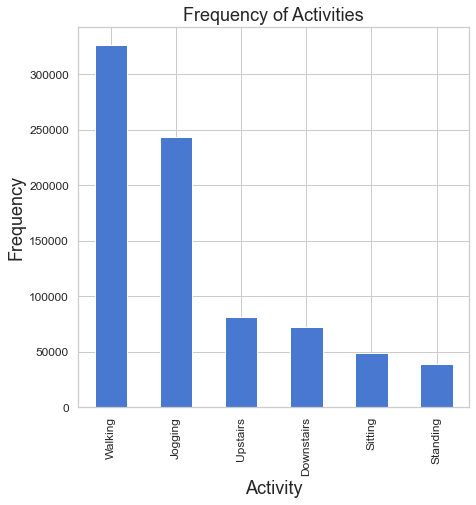

In [25]:
freqofact = newdf['activity'].value_counts()
freqofact.plot(kind = 'bar', title = 'Frequency of Activities', figsize=(7,7) , xlabel = 'Activity', ylabel='Frequency' , fontsize =12 )

In [26]:
# !pip install plotly
import plotly.express as px
fig = px.pie(metadata, names='activity', title = 'Pie chart for 6 Activities (in %)', opacity = 1)
fig.update_layout(legend=dict(yanchor="top",y=0.45, xanchor="left", x=0.10))
fig.show()

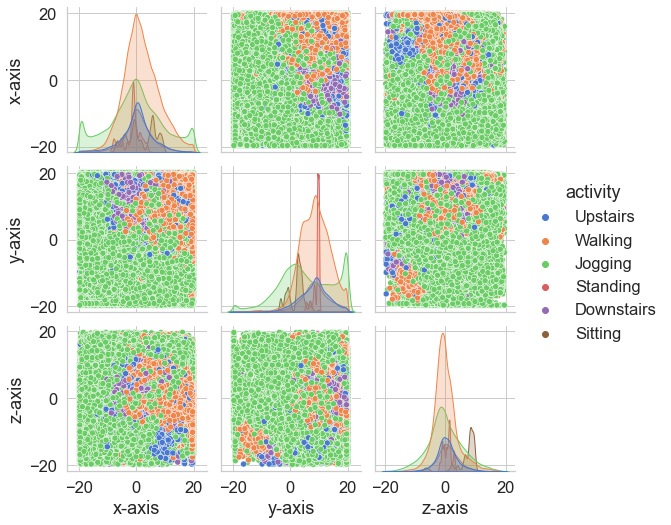

In [27]:
sns.pairplot(newdf.drop(columns=['user_snippet']), hue = 'activity')

Classes are overlapping and not linearly seperable

In [28]:
def histogram_plots(df,var,i):
    # Using a 1x3 subplot
    plt.subplot(1,3,i)
    sns.histplot(data = df, x = var, kde=True , hue = 'activity', cumulative = False)
    return plt
   # plt.savefig(var+'_hist'+'.png')

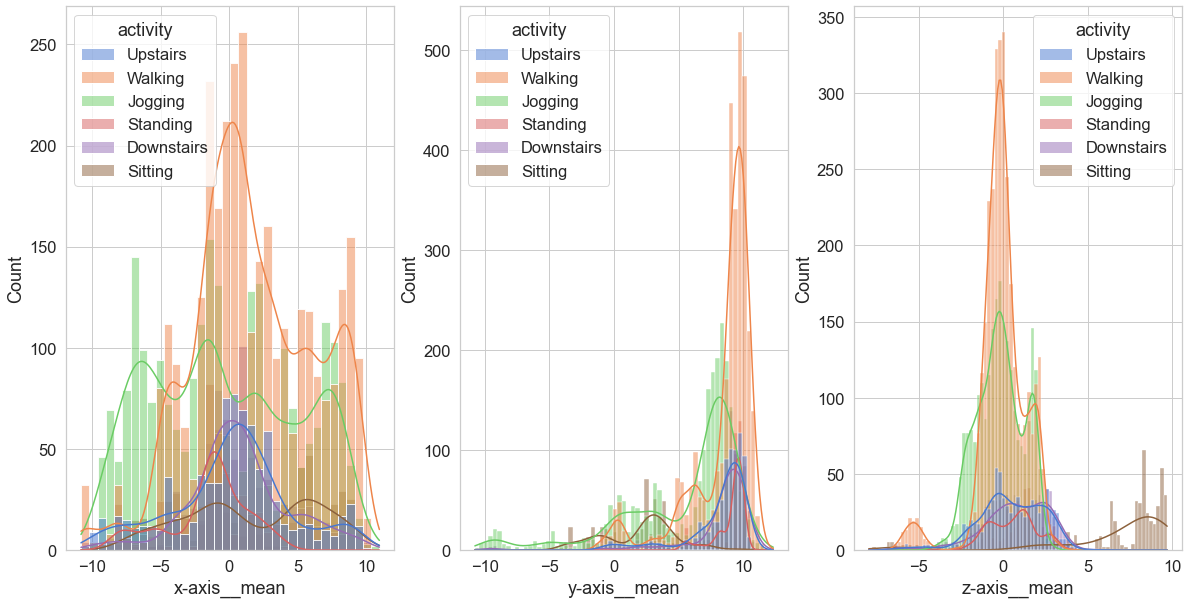

In [29]:
fig = plt.figure(figsize=(20,10))
histogram_plots(metadata, 'x-axis__mean' , 1)
histogram_plots(metadata, 'y-axis__mean', 2)
histogram_plots(metadata, 'z-axis__mean', 3)
plt.show()

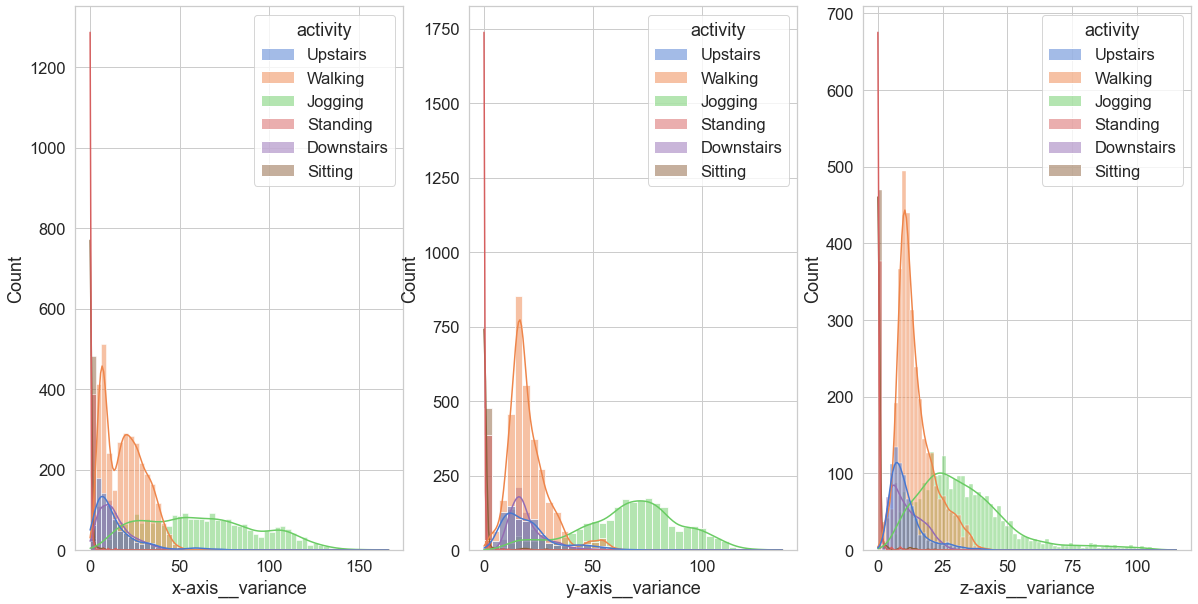

In [30]:
fig = plt.figure(figsize=(20,10))
histogram_plots(metadata, 'x-axis__variance' , 1)
histogram_plots(metadata, 'y-axis__variance', 2)
histogram_plots(metadata, 'z-axis__variance', 3)
plt.show()

In [31]:
metadata.keys()

Index(['user_snippet', 'x-axis__sum_values', 'x-axis__median', 'x-axis__mean',
       'x-axis__length', 'x-axis__standard_deviation', 'x-axis__variance',
       'x-axis__root_mean_square', 'x-axis__maximum',
       'x-axis__absolute_maximum', 'x-axis__minimum', 'y-axis__sum_values',
       'y-axis__median', 'y-axis__mean', 'y-axis__length',
       'y-axis__standard_deviation', 'y-axis__variance',
       'y-axis__root_mean_square', 'y-axis__maximum',
       'y-axis__absolute_maximum', 'y-axis__minimum', 'z-axis__sum_values',
       'z-axis__median', 'z-axis__mean', 'z-axis__length',
       'z-axis__standard_deviation', 'z-axis__variance',
       'z-axis__root_mean_square', 'z-axis__maximum',
       'z-axis__absolute_maximum', 'z-axis__minimum', 'activity'],
      dtype='object')

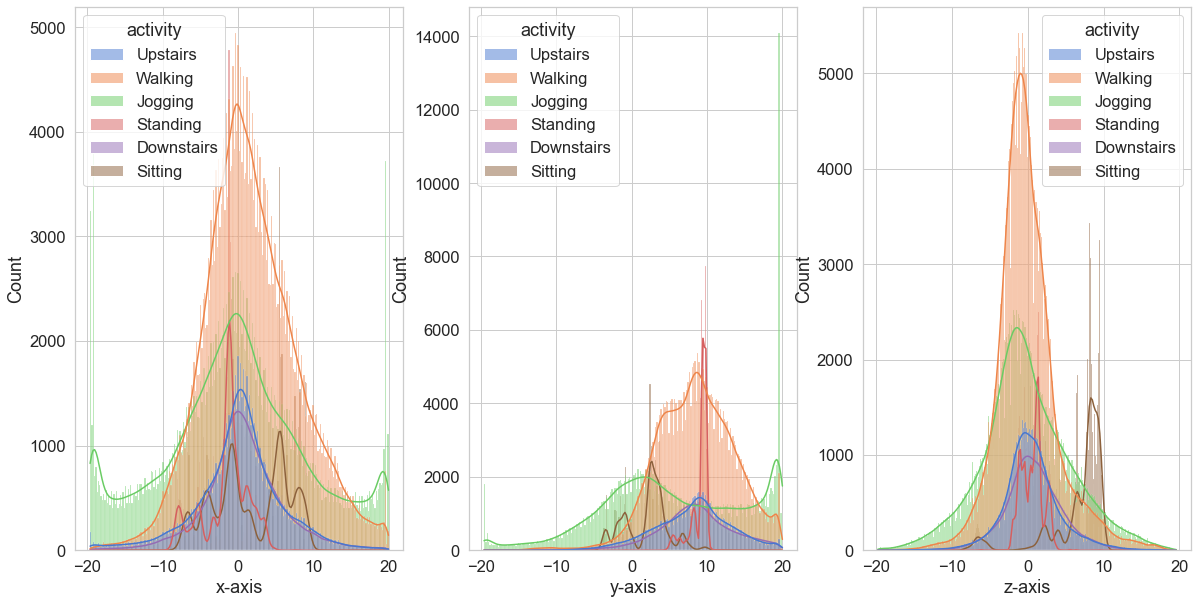

In [32]:
fig = plt.figure(figsize=(20,10))
histogram_plots(newdf, 'x-axis',1)
histogram_plots(newdf, 'y-axis',2)
histogram_plots(newdf, 'z-axis',3)

plt.show()

Talk about the skewness and the outliers

In [33]:
from scipy.stats import skew

In [ ]:
skewness = skew(signals)
skewness

In [ ]:
signals.keys()

In [ ]:
signals['user_snippet'].value_counts()

In [ ]:
signals['user_snippet'].str.split('_').str[0].unique() #Unique user_snippet

In [ ]:
len(signals['user_snippet'].str.split('_').str[0].unique()) #Unique user_snippet

Therefore, data of 28 users out of total 36 users's data is collected in signals files 

In [ ]:
len(signals_test['user_snippet'].str.split('_').str[0].unique()) #Unique user_snippet

Hence, proved that signals_test carry data for the remaining 8 users. 

In [ ]:
li = signals['user_snippet'].value_counts()
valids = li[li<100].index

df = signals[signals['user_snippet'].isin(valids)] #create a dataframe To get rows of deficit indices

In [ ]:
df

In [ ]:
iden = df['user_snippet'].value_counts().index
val = df['user_snippet'].value_counts().values
print(iden) 
print(val)

In [ ]:
df['user_snippet'].value_counts()

In [ ]:
for i in range(len(iden)):
        ind = signals[signals['user_snippet'] == iden[i]].iloc[-2:-1].index[0]
        num = 100 - val[i]
        print(ind,num) #Will give the number of rows to be added at given index 
        

In [ ]:
# Extract the features and target variable
X = metadata.iloc[:, :-1].values
y = metadata.iloc[:, -1].values


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()

# Fit the label encoder to the data
le.fit(y)

# Transform the data using the label encoder
y = le.transform(y)

In [ ]:
le.classes_

In [ ]:
y

In [ ]:
# Heatmap of metadata file
X = metadata.drop('activity', axis=1) 
y_train = metadata['activity']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)

y_train = pd.Series(le.transform(y_train)).to_numpy()

# Checking correlation between data
cor_df = X.drop(columns=['user_snippet']) #Dropping the object type column
cor_df['activity'] = pd.Series(y_train) #Converting the target column to a pandas series 

fig = plt.figure(figsize=(25,12))
dataplot = sns.heatmap(cor_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Data Visualization using PCA, tSNE & Autoencoders

All 3 are for dimensionality reduction. We need to find out if the clusters are seperable 

In [ ]:
#Importing all the libraries 
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
import umap

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline


## Scaling the Data 
We will use the StandardScaler function from scikit-learn to scale the data. This will ensure that the data is centred around zero and has a standard deviation of one.

In [ ]:
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Principal Component Analysis 
* To perform the PCA analysis, the *PCA* function from *scikit-learn* was used. The *fit_transform* function was applied to perform the analysis and transform the data. Remember that the *fit_transform* function performs the analysis and transforms the data in one step.
* We will use `n_components=2` to reduce the data to two dimensions, so the projected data can be visualised in a 2D plot.

In [ ]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Function to plot the PCA visualization with class labels overlaid

def plot_data_projection(X, y):
    plt.figure(figsize=(8,8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="plasma", alpha=0.5, s=10)

    # Create a legend for the plot
    handles, labels = scatter.legend_elements()
    lab = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']
    plt.legend(handles, lab, loc="lower left", title="Classes", fontsize=8)

    # Show the plot
    plt.show()
# Note: Given the large dataset, the code may take longer to run than usual 

In [ ]:
plot_data_projection(X_pca, y)

From the above plot, it can be seen that PCA is able to separate the classes.
What else the above plot tells us about the data? - 

## t-distributed Stochastic Neighbor Embedding (t-SNE)

We will use the TSNE function from scikit-learn to perform the t-SNE analysis. We will use the fit_transform function to perform the analysis and transform the data

In [ ]:
### Perform t-SNE on the dataset

tsne = TSNE(n_components=2, perplexity=85, random_state=42) #perplexity checks number of neighbors 
X_tsne = tsne.fit_transform(X)

In [ ]:
# Plot the t-SNE visualization with class labels overlaid
plot_data_projection(X_tsne, y)

With perplexity 100, it can be seen that clusters of Jogging, sitting and standing can be easily seperated. However, Activities like walking, downstairs and sitting are overlapping. 

## Unified Manifold Approximation and Projection (UMAP)

We will use the UMAP function from umap to perform the UMAP analysis. As before, we will fit an UMAP model first, then we will use it to project the data onto a 2D space.

In [ ]:
# Perform UMAP dimensionality reduction on the dataset
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)



In [ ]:
# Plot the UMAP visualization with class labels overlaid
plot_data_projection(X_umap, y)

## K-Nearest Neighbor (K-NN)

In [ ]:
X_train = metadata.drop(columns=['user_snippet','activity']).to_numpy()
X_test = metadata_test.drop(columns='user_snippet').to_numpy()
y_train = metadata['activity'].to_numpy()

## Data Modeling 

In [ ]:
X = metadata.drop('activity', axis=1) # features
y = metadata['activity'] # target

### Logistic Regression 

1. Split the samples into a training set and a test set in order to estimate the test error of the regression models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
metadata = pd.read_csv('/kaggle/input/activity-data/metadata.csv')
metadata_test = pd.read_csv('/kaggle/input/activity-data/metadata_test.csv')
signals = pd.read_csv('/kaggle/input/activity-data/signals.csv')
signals['user_snippet'].str.split('_').str[0]
df = signals[signals['user_snippet'] == '1008_0']
np.mean(df['x-axis'])
X_train = metadata.drop(columns=['user_snippet','activity']).to_numpy()
X_test = metadata_test.drop(columns='user_snippet').to_numpy()
y_train = metadata['activity'].to_numpy()
from sklearn import preprocessing

mm_scaler = preprocessing.StandardScaler()  # creates a Transformer (set of preprocessing operations)
X_train = mm_scaler.fit_transform(X_train)  # estimates transformation parameters using the training set, and applies to them
X_test = mm_scaler.transform(X_test) # transforms test set using training set parameters.

from sklearn.linear_model import LogisticRegression   # imports the logistic regression module implemented in sklearn
mdl = LogisticRegression(max_iter = 1000)    # sets up the algorithm (or learner)
mdl.fit(X_train, y_train)    # fits the model to the training data

y_tst_lr = mdl.predict(X_test)

dset_sol_lr = pd.DataFrame({"user_snippet": metadata_test.user_snippet, "prediction" : y_tst_lr})
dset_sol_lr.head()

dset_sol_lr.to_csv("activity_prediction_lr.csv", index=False)

## MLP

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

dset_trn = pd.read_csv('metadata.csv')
dset_tst = pd.read_csv('metadata_test.csv')

X_train = dset_trn.drop(columns=['user_snippet','activity']).to_numpy()
X_test = dset_tst.drop(columns='user_snippet').to_numpy()
y_train = dset_trn['activity'].to_numpy()

from sklearn import preprocessing

mm_scaler = preprocessing.StandardScaler()  # creates a Transformer (set of preprocessing operations)
X_train = mm_scaler.fit_transform(X_train)  # estimates transformation parameters using the training set, and applies to them
X_test = mm_scaler.transform(X_test) # transforms test set using training set parameters.

from sklearn.neural_network import MLPClassifier
mlp_mdl = MLPClassifier(hidden_layer_sizes=(5,),random_state=42, max_iter=1000)

mlp_mdl.fit(X_train, y_train)

y_tst_lr2 = mlp_mdl.predict(X_test)

dset_sol_lr2 = pd.DataFrame({"user_snippet": dset_tst.user_snippet, "Prediction" : y_tst_lr2})
dset_sol_lr2.head()

dset_sol_lr2.to_csv("activityprediction_MLP1.csv", index=False)


## randomforest_model

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

dset_trn = pd.read_csv('metadata.csv')
dset_tst = pd.read_csv('metadata_test.csv')

X_train = dset_trn.drop(columns=['user_snippet','activity']).to_numpy()
X_test = dset_tst.drop(columns='user_snippet').to_numpy()
y_train = dset_trn['activity'].to_numpy()

from sklearn import preprocessing

mm_scaler = preprocessing.StandardScaler()  # creates a Transformer (set of preprocessing operations)
X_train = mm_scaler.fit_transform(X_train)  # estimates transformation parameters using the training set, and applies to them
X_test = mm_scaler.transform(X_test) # transforms test set using training set parameters.

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestClassifier())),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 500],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'feature_selection__threshold': ['mean', 'median', '1.25*mean']
}
# Define the cross-validation strategy
cv = 5
# Perform hyperparameter tuning using grid search
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=cv, scoring=scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

y_tst_gs1 = grid_search.predict(X_test)

dset_sol_gs1 = pd.DataFrame({"user_snippet": dset_tst.user_snippet, "Prediction" : y_tst_gs1})
dset_sol_gs1.head()
dset_sol_gs1.to_csv("activityprediction_rf3.csv", index=False)

## SVC

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

dset_trn = pd.read_csv('metadata.csv')
dset_tst = pd.read_csv('metadata_test.csv')

X_train = dset_trn.drop(columns=['user_snippet','activity']).to_numpy()
X_test = dset_tst.drop(columns='user_snippet').to_numpy()
y_train = dset_trn['activity'].to_numpy()

from sklearn import preprocessing

mm_scaler = preprocessing.StandardScaler()  # creates a Transformer (set of preprocessing operations)
X_train = mm_scaler.fit_transform(X_train)  # estimates transformation parameters using the training set, and applies to them
X_test = mm_scaler.transform(X_test) # transforms test set using training set parameters.
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_clf = SVC()
# Define the hyperparameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
y_tst_grid_search = grid_search.predict(X_test)

dset_sol_grid_search = pd.DataFrame({"user_snippet": dset_tst.user_snippet, "Prediction" : y_tst_grid_search})
dset_sol_grid_search.head()
dset_sol_grid_search.to_csv("activityprediction_SVC1.csv", index=False)


# CNN (Final model)

In [ ]:
#we used google colab for this task and all the data files uploaded from my google drive
from google.colab import drive
drive.mount('/content/drive')


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

dset_trn = pd.read_csv("/content/drive/MyDrive/7021/courswork_2021/metadata.csv")  # reads csv files
dset_trn.head() # shows the top rows of data
dset_tst = pd.read_csv("/content/drive/MyDrive/7021/courswork_2021/metadata_test.csv")
dset_tst.head()

X_train = dset_trn.drop(columns=['user_snippet','activity']).to_numpy()
X_test = dset_tst.drop(columns='user_snippet').to_numpy()
y_train = dset_trn['activity'].to_numpy()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = StandardScaler()

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = StandardScaler()
X_train = numeric_transformer.fit_transform(X_train)  # estimates transformation parameters using the training set, and applies to them
X_test = numeric_transformer.transform(X_test) 
X_train.shape

from sklearn.preprocessing import LabelEncoder

# Convert target variable to integer format
le = LabelEncoder()
y_train = le.fit_transform(y_train)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 6)
#y_test = to_categorical(y_test, 6)


In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Define CNN... 
model2 = Sequential()
model2.add(Dense(350, activation='relu', input_shape=(30,))) # 350 neurons in the first layer and so on
# Activation = 'relu' good for DNN
# input_shape contains 30 because that is the total number of columns. 
model2.add(Dropout(0.25)) #Randomly deactiavtes 25% of the neurons in the layer.
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(50, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(6, activation='softmax'))
model2.summary()
# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model2.fit(X_train, y_train, batch_size=62, epochs=50,verbose=1,validation_split=0.01)

def plot_history(history):
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.subplot(2,1,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    return;

plot_history(history)


y_prob = model2.predict(X_test) 
y_classes = y_prob.argmax(axis=-1)
y=list(le.inverse_transform(y_classes))

df = pd.DataFrame({"user_snippet": dset_tst.user_snippet, 'prediction': y})
df.head()

df.to_csv("/content/drive/MyDrive/7021/courswork_2021/activityprediction_CNN26.csv", index=False)